## Mobile Price Classification using Machine Learning 

### Project Flow:

We will follow the given below flow in this project
1. Import Libraries
2. Load the data
3. Exploratory Data Analysis (EDA)
4. Data Preprocessing, Visualization
5. Selecting X and y variables
6. Data Splicing (Making train & test splits)
7. Selecting the Model
8. Making Predictions and Calculate Accuracy

## 1. Importing Python Libraries

In [35]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## 2. Load the Data

In [2]:
# loading the data in workspace
mobile_data = pd.read_csv('mobile_data.csv')
mobile_data.shape

(2000, 21)

As the cell outputs, we have 2000 training examples and 21 features (columns) in our training data

## 3. EDA (Exploratory Data Analysis)

To make most out of our machine learning model, it is necessary thet we follow EDA for better data undertsanding. This procedure will include following steps:
* Data Understanding
* Data Preprocessing
* Data Visualization

In [4]:
# lets look at the first 4 rows in our dataset
mobile_data.head(4)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2


In [5]:
print('Columns in Data: %s' % str(len(mobile_data.columns)))

Columns in Data: 21


In [6]:
# checking the columns in data
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
mobile_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


The data has a large set of Statistical Summaries. To put it in a nutshell, we can summatrize it as follows:
* We have a total of 2000 samples in data
* Mean battery power of each mobile is 1238 approx.
* 75% of mobiles have dual sim functionality installed
* 75% mobiles have 3G and 4G installed
* Most of the mobile prices fall in 2-3 range category

In [11]:
# check again for some null values
mobile_data.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

The columns show the net sum of null values as 0, indicating that there is no null value in the data

## 4. Data Visualization
A picture is worth a thousand words. The data can be randomly sampled, so it would be difficult to undertand wothout pictures. We will make some interactive plots to see the data trend, distribution, and get some useful insights.  

In [12]:
mobile_data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<Axes: xlabel='price_range', ylabel='count'>

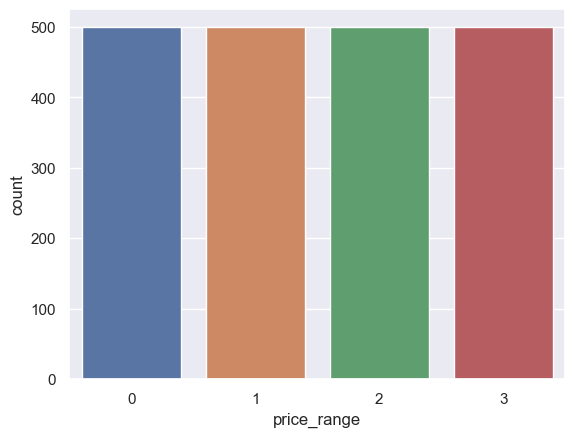

In [22]:
# let's look at the price range for every mobile
sns.set(style='darkgrid')
sns.countplot(x=mobile_data['price_range'])

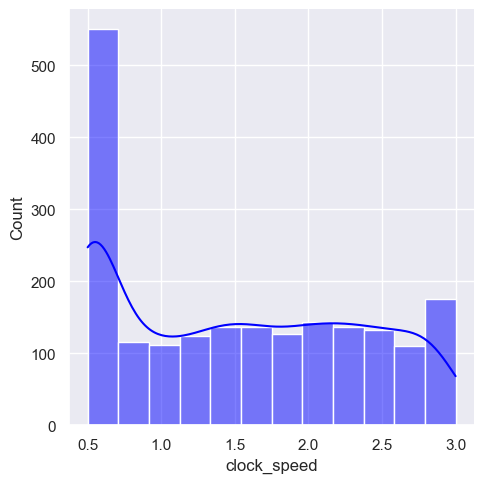

In [19]:
sns.set(style='darkgrid')
ax = sns.displot(x=mobile_data['clock_speed'], 
                 color='blue', kde=True)

The distribution plot shows that:
* Describes the relationship between clock speed pf mobiles with repect to number of mobiles in data
* Most of the mobiles have clock speed ranging between (0.5 - 1.0)
* Except that, all data has clock speed ranging from (1.0 - 3.0) 

<Axes: xlabel='three_g', ylabel='count'>

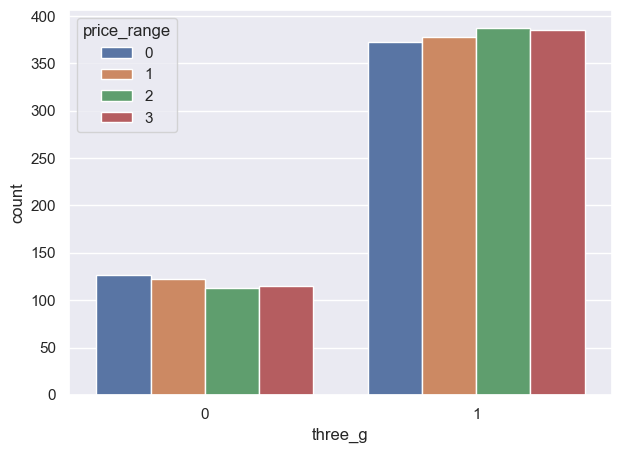

In [25]:
fig, axes = plt.subplots(figsize=(7, 5))
sns.countplot(x=mobile_data['three_g'], 
              hue=mobile_data.price_range)

Let's summarize what imformation does this plot give:
* The Plot describes how many mobiles have **3G**, wrt their prices
* X axis show the 3G feature, while Y axis show the count of these features
* Most of the mobiles have **3G** features insatlled
* 0 means no 3G and 1 means there is a 3G

## 5. Selection of X and Y Variables:
* The predictor or X variables are the features of the data, which will decide the label. We are including all features as    
predictors and we are taking y the **price_range** label in our data, which has 4 possible answers: (0, 1, 2, 3)
 
* The `.drop()` function takes the feature to be dropped, and is given the axis 1, since in a structured data, rows have axis = 0 and columns have axis = 1

* We are including just 'price_range' feature as label, and we will assign this to y

In [26]:
X = mobile_data.drop('price_range', axis=1)
y = mobile_data['price_range']

X.shape, y.shape

((2000, 20), (2000,))

## 6. Feature Scaling

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
X_scaled[:2]

array([[0.22778891, 0.        , 0.68      , 0.        , 0.05263158,
        0.        , 0.08064516, 0.55555556, 0.9       , 0.14285714,
        0.1       , 0.01020408, 0.17089453, 0.61277392, 0.28571429,
        0.38888889, 0.94444444, 0.        , 0.        , 1.        ],
       [0.34736139, 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.82258065, 0.66666667, 0.46666667, 0.28571429,
        0.3       , 0.46173469, 0.99332443, 0.63468733, 0.85714286,
        0.16666667, 0.27777778, 1.        , 1.        , 0.        ]])

## 7. Splitting Dataset
The dataset i splitted into 2 sets, i.e., traon & test. Training data contains 80% while testing data has 20% of samples.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [29]:
print('Total data samples: ', len(X))
print('Total training samples: ', len(X_train))
print('Total testing samples: ', len(X_test))

Total data samples:  2000
Total training samples:  1600
Total testing samples:  400


## 8. Chossing Models for our data (Model Selection)
We will be using 2 algorithms to be used on data, as described below:
1. Logistic Regression
2. Nearest Neighbor Classification (KNN)

Before applying these models, we will have a brief description of how do these models work  

## Fitting Model to Data
1. First, we will initialize the model which is to be implemented
2. Second, we will fit the model to our training and testing data sets
3. We will find accuracy scores for each of the models
4. We will make a Bar Plot to describe the result of our model 

### Applying Logistic Regression

In [30]:
model_lr = LogisticRegression(max_iter=2000)
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

y_pred[:10]

array([3, 1, 0, 1, 3, 2, 0, 0, 1, 0], dtype=int64)

In [39]:
print('Training Accuracy of Logistic Regression:', (model_lr.score(X_train, y_train) * 100),'%')
print('Training Accuracy of Logistic Regression:', (model_lr.score(X_test, y_test) * 100),'%')

Training Accuracy of Logistic Regression: 93.1875 %
Training Accuracy of Logistic Regression: 91.75 %


### Applying KNN Algorithm

In [49]:
model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [50]:
print('Training Accuracy of KNN:', np.round((model_knn.score(X_train, y_train) * 100), 3),'%')
print('Training Accuracy of KNN:', (model_knn.score(X_test, y_test) * 100),'%')

Training Accuracy of KNN: 60.562 %
Training Accuracy of KNN: 42.75 %


<BarContainer object of 2 artists>

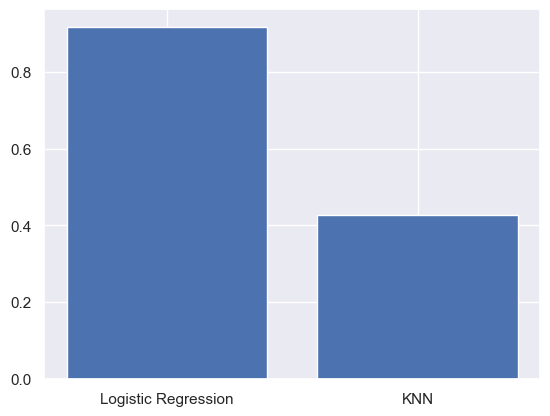

<Figure size 700x500 with 0 Axes>

In [53]:
acc_lr = model_lr.score(X_test, y_test)
acc_knn = model_knn.score(X_test, y_test)

fig, axes = plt.subplots()
fig = plt.figure(figsize=(7, 5))
models = ['Logistic Regression', 'KNN']
scores = [acc_lr , acc_knn]
axes.bar(models, scores)

### Confusion Matrix of Logistic Regression

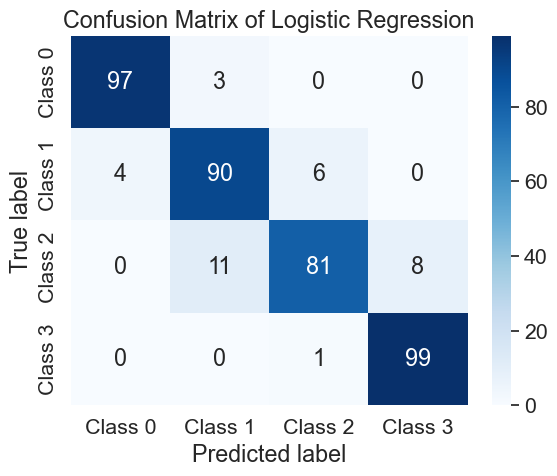

In [59]:
cm = confusion_matrix(y_test, y_pred)

class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

sns.set(font_scale=1.4)
sns.heatmap(cm, 
            annot=True, cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()